Data citation:
Cheng, Jun. "brain tumor dataset." Figshare. Dataset posted on 02/04/2017. https://figshare.com/articles/dataset/brain_tumor_dataset/1512427

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

-----
This data was used in the following paper:

1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).

2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com



In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


**Importing necessary libraries**

In [2]:
import os
os.chdir(r'C:\Users\vinhm\Springboard-Capstone\Capstone Two Data Wrangling\Data\brainTumorDataPublic_1-3064')

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import mat73
import cv2
import scipy
from scipy import io
from itertools import chain

Obtaining files from directory location

In [3]:
files = pd.DataFrame(glob('*'))
files = files.values.tolist()
files = list(chain(*files))
files

['0001.mat',
 '0002.mat',
 '0003.mat',
 '0004.mat',
 '0005.mat',
 '0006.mat',
 '0007.mat',
 '0008.mat',
 '0009.mat',
 '0010.mat',
 '0011.mat',
 '0012.mat',
 '0013.mat',
 '0014.mat',
 '0015.mat',
 '0016.mat',
 '0017.mat',
 '0018.mat',
 '0019.mat',
 '0020.mat',
 '0021.mat',
 '0022.mat',
 '0023.mat',
 '0024.mat',
 '0025.mat',
 '0026.mat',
 '0027.mat',
 '0028.mat',
 '0029.mat',
 '0030.mat',
 '0031.mat',
 '0032.mat',
 '0033.mat',
 '0034.mat',
 '0035.mat',
 '0036.mat',
 '0037.mat',
 '0038.mat',
 '0039.mat',
 '0040.mat',
 '0041.mat',
 '0042.mat',
 '0043.mat',
 '0044.mat',
 '0045.mat',
 '0046.mat',
 '0047.mat',
 '0048.mat',
 '0049.mat',
 '0050.mat',
 '0051.mat',
 '0052.mat',
 '0053.mat',
 '0054.mat',
 '0055.mat',
 '0056.mat',
 '0057.mat',
 '0058.mat',
 '0059.mat',
 '0060.mat',
 '0061.mat',
 '0062.mat',
 '0063.mat',
 '0064.mat',
 '0065.mat',
 '0066.mat',
 '0067.mat',
 '0068.mat',
 '0069.mat',
 '0070.mat',
 '0071.mat',
 '0072.mat',
 '0073.mat',
 '0074.mat',
 '0075.mat',
 '0076.mat',
 '0077.mat',

Convert filename to include leading '0'

In [4]:
# for file in files:
#     filestr = ''.join([str(item) for item in file])
#     filename = os.path.splitext(filestr)[0]
#     filenum = filename.replace('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/brainTumorDataPublic_1-3064\\', '')
#     newnum = filenum.zfill(4)
#     newname = r'C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/brainTumorDataPublic_1-3064\\' + newnum + '.mat'
#     os.rename(filestr, newname)
#     print(newname)

In [5]:
f = h5py.File('0001.mat', 'r')
PID = f['cjdata']['PID']
PID = list(chain(*PID))
PID = "Patient ID: " + ''.join([str(item) for item in PID])
label = list(f['cjdata']['label'][0])
for i in range(0, len(label)):
        label[i] = int(label[i])
label = ''.join([str(item) for item in label])
image = f['cjdata']['image']
tumorMask = f['cjdata']['tumorMask']

 File Name:   0001.mat


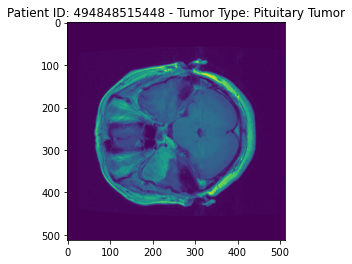

In [6]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(image)
if label == 1:
    label = " - Tumor Type: Meningioma"
elif label == 2:
    label = " - Tumor Type: Glioma"
else:
    label = " - Tumor Type: Pituitary Tumor"
plt.title(PID + label)
cmap = plt.cm.jet
plt.imsave('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/0001_mri.png', image, cmap=cmap)

 File Name:   0001.mat


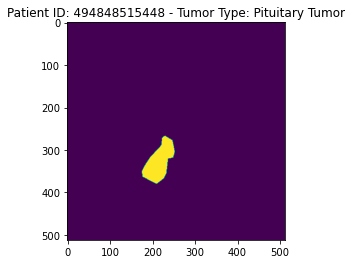

In [7]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(tumorMask)
if label == 1:
    label = " - Tumor Type: Meningioma"
elif label == 2:
    label = " - Tumor Type: Glioma"
else:
    label = " - Tumor Type: Pituitary Tumor"
plt.title(PID + label)
plt.imsave('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/0001_mask.png', tumorMask, cmap=cmap)

 File Name:   0001.mat


Text(0.5, 1.0, 'Patient ID: 494848515448 - Tumor Type: Pituitary Tumor')

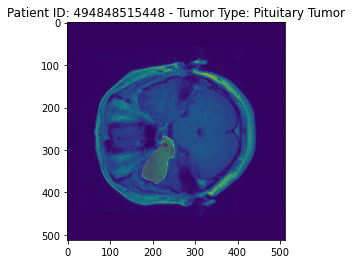

In [8]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(image)
plt.imshow(tumorMask, cmap='jet', alpha=0.25)
if label == 1:
    label = " - Tumor Type: Meningioma"
elif label == 2:
    label = " - Tumor Type: Glioma"
else:
    label = " - Tumor Type: Pituitary Tumor"
plt.title(PID + label)

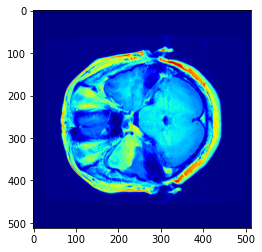

In [9]:
img1 = mpimg.imread("C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/0001_mri.png")
plt.imshow(img1)

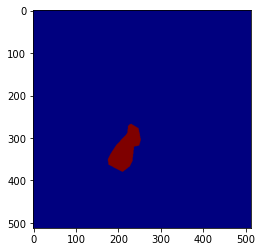

In [10]:
img2 = mpimg.imread("C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/0001_mask.png")
plt.imshow(img2)

Text(0.5, 1.0, 'Mask + Image')

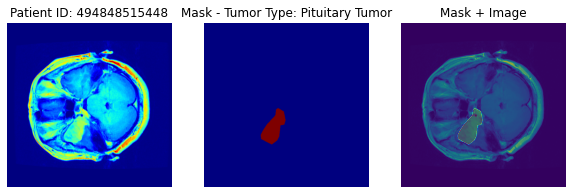

In [11]:
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(img1)
plt.axis('off')
plt.title(PID)

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('off')
plt.title("Mask" + label)

fig.add_subplot(rows, columns, 3)

plt.imshow(image)
plt.imshow(tumorMask, cmap='jet', alpha=0.25)
plt.axis('off')
plt.title("Mask + Image")

Combining elements of data and plotting image provided. A mask for tumor location was applied to each file. 

In [12]:
# for x in files[0:9]:
#     f = h5py.File(x, 'r')
#     PID = f['cjdata']['PID']
#     PID = list(chain(*PID))
#     PID = "Patient ID: " + ''.join([str(item) for item in PID])
#     print('\033[1m', "File Location: ", '\033[0m', x)
#     label = list(f['cjdata']['label'][0])
#     for i in range(0, len(label)):
#         label[i] = int(label[i])
#     label = ''.join([str(item) for item in label])
#     image = f['cjdata']['image']
#     tumorMask = f['cjdata']['tumorMask']
#     imgplot = plt.imshow(image)
#     maskplot = plt.imshow(tumorMask, cmap='jet', alpha=0.25)
#     if label == 1:
#         label = " - Tumor Type: Meningioma"
#     elif label == 2:
#         label = " - Tumor Type: Glioma"
#     else:
#         label = " - Tumor Type: Pituitary Tumor"
#     plt.title(PID + label)
    
#     plt.show()

convert .mat to .csv

https://www.google.com/search?q=how+to+make+a+.csv+file+of+.mat+files&rlz=1C1FKPE_enUS961US961&oq=how+to+make+a+.csv+file+of+.mat+files&aqs=chrome..69i57j33i160j33i299j33i22i29i30l2.10523j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_OI-EYpDKEKTEqtsPkMCJmAw18

walkthrough

https://www.analyticsvidhya.com/blog/2021/06/brain-tumor-detection-and-localization-using-deep-learning-part-1/